In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [19]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
crypto_data = pd.read_csv('/Users/katiekavanagh/Desktop/Resources/crypto_market_data.csv', index_col='coin_id')

file_path = os.path.join(resources_path, 'crypto_market_data.csv')
if 'crypto_market_data.csv' in os.listdir(resources_path):
    crypto_data = pd.read_csv(file_path, index_col='coin_id')

# Display the summary statistics
print(crypto_data.describe())


# Display sample data
print(crypto_data.head(10))

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

In [21]:
# Generate summary statistics
print(crypto_data.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

### Prepare the Data

In [23]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [25]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=crypto_data.columns)

# Copy the crypto names from the original data
scaled_data = scaler.fit_transform(crypto_data)

# Set the coinid column as index
scaled_df = pd.DataFrame(scaled_data, columns=crypto_data.columns, index=crypto_data.index)


# Display sample data
print(scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [26]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)



[287.0, 198.5718180979813, 145.63574772192862, 79.02243535120975, 66.21778006000338, 59.13907002537009, 48.406314490413614, 38.99358798927969, 34.40059545400234, 28.57360256096785, 23.890044355377952]


In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


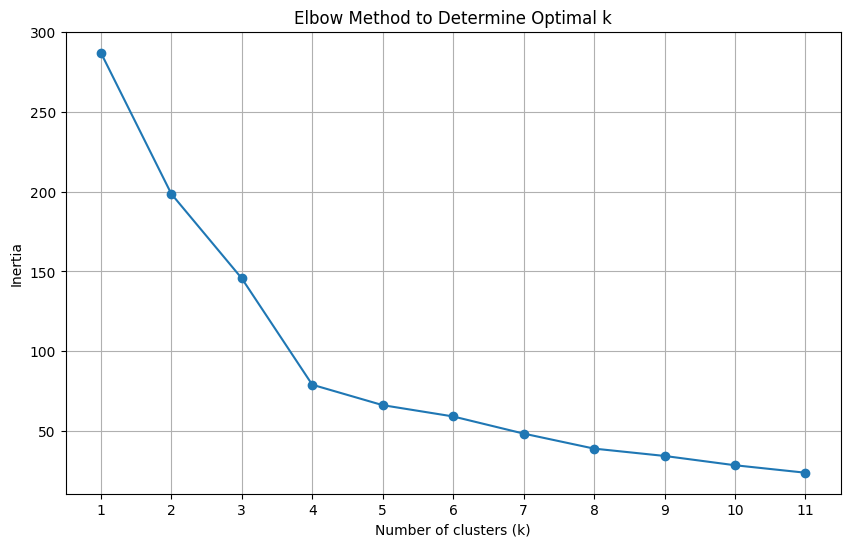

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  The best value for k is usually found at the "elbow point" on the Elbow curve plot. This would be 4 in the above model. This is where the decrease in inertia slows down noticeably, showing that adding more clusters doesn't improve the results as much.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [31]:
# Initialize the K-Means model using the best value for k
# Best value for k identified from the Elbow curve
best_k = 4 
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [32]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


KMeans(n_clusters=4, random_state=0)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_df)


# View the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [37]:
# Create a copy of the DataFrame
crypto_data_clustered = crypto_data.copy()
crypto_data_clustered['Cluster'] = predicted_clusters

print(crypto_data_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [38]:
# Add a new column to the DataFrame with the predicted clusters
crypto_data_clustered['Cluster'] = predicted_clusters


# Display sample data
print(crypto_data_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

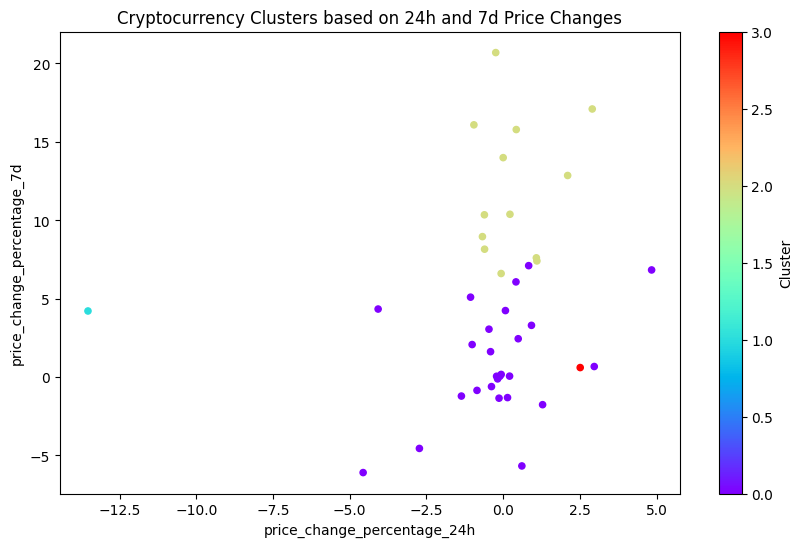

In [39]:
# Create a scatter plot using Pandas plot by setting 
crypto_data_clustered.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='rainbow',
    figsize=(10, 6),
    title='Cryptocurrency Clusters based on 24h and 7d Price Changes'
)

plt.show()

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.


### Optimize Clusters with Principal Component Analysis.

In [41]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [42]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=crypto_data.index)

# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [45]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print(f'Explained variance of each principal component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

Explained variance of each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?  

**Answer:** The total explained variance is the sum of the explained variance ratios. It shows how much of the data's variability is captured by the three principal components.  
Explained variance of each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.895031657030984

In [46]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_data.index

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [50]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
k_values_pca = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using the PCA DataFrame
    kmeans_pca.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Display the inertia values
print(inertia_values_pca)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print(elbow_df_pca)

[256.8740855678923, 168.8118963068521, 115.9180766332005, 49.665496651797326, 41.35731380312852, 30.796641787041573, 25.915456910456115, 21.890936274633205, 17.720698854473646, 13.838698708864563, 7.984354811896218]
     k     inertia
0    1  256.874086
1    2  168.811896
2    3  115.918077
3    4   49.665497
4    5   41.357314
5    6   30.796642
6    7   25.915457
7    8   21.890936
8    9   17.720699
9   10   13.838699
10  11    7.984355


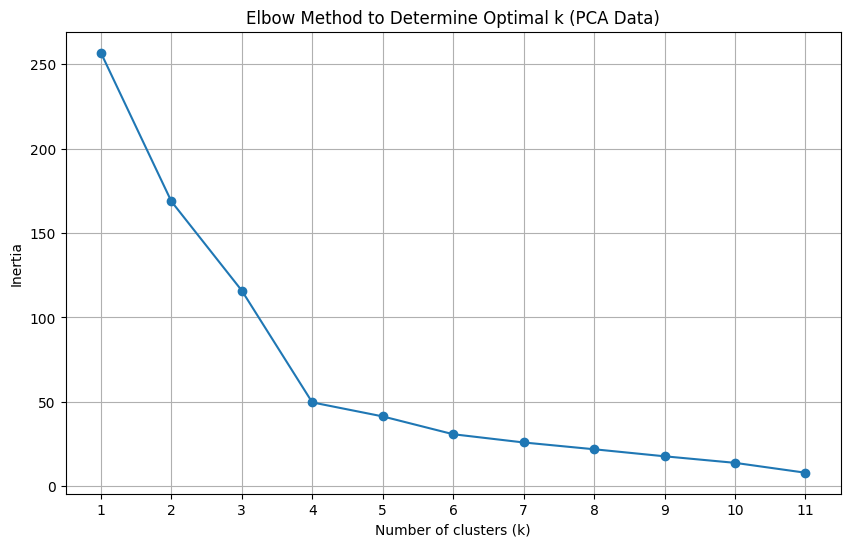

In [51]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Method to Determine Optimal k (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_pca)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is typically identified at the "elbow point" of the Elbow curve plot. This is the point where the decrease in inertia starts to slow down.  In the above data the elbow is at 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ from the best k value found using my original data.  It remains the same, the elbow is at 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [52]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4 
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [53]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [55]:
# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = pca_clusters

# Display sample data
print(pca_df_with_clusters.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [56]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
pca_df_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    colormap='rainbow',
    hover_cols=['Cluster'],
    title='Cryptocurrency Clusters based on PCA Components'
)

:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [57]:
# Use the columns from the original scaled DataFrame as the index.

# Retrieve the PCA components
pca_components = pca.components_

# Create a DataFrame with the PCA components
pca_components_df = pd.DataFrame(pca_components, columns=scaled_df.columns, index=['PC1', 'PC2', 'PC3'])

# Transpose the DataFrame to have the original features as the index
pca_components_df = pca_components_df.T

# Display the DataFrame
print(pca_components_df)


                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
#I am unclear just how much you would like this explained, so I am answering this in two ways:

PC1: 1y (positive), 24h (negative)
PC2: 30d (positive), 1y (negative)
PC3: 7d (positive), 60d (negative)

PC1 is influenced most by the long-term price change (1 year) in a positive direction and by the short-term price change (24 hours) in a negative direction.

PC2 is influenced most by the medium-term price change (30 days) in a positive direction and the long-term price change (1 year) in a negative direction.

PC3 is influenced most by the short-term price change (7 days) in a positive direction and the medium-term price change (60 days) in a negative direction. 